simple example

based on 3 column

salary | weight | married/status | [age(cont),place(cat)]

In [1]:
from keras.models import Model
from keras.layers import *

X=Input(shape=(3,))

In [2]:
hidden1=Dense(128, activation='relu')(X)

hidden2=Dense(64,activation='relu')(hidden1)


output1=Dense(1,activation="linear")(hidden2)

output2=Dense(1,activation="sigmoid")(hidden2)

In [3]:
model=Model(inputs = X ,outputs = [output1,output2])

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 128)                  512       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 64)                   8256      ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 1)                    65        ['dense_1[0][0]']             
                                                                                              

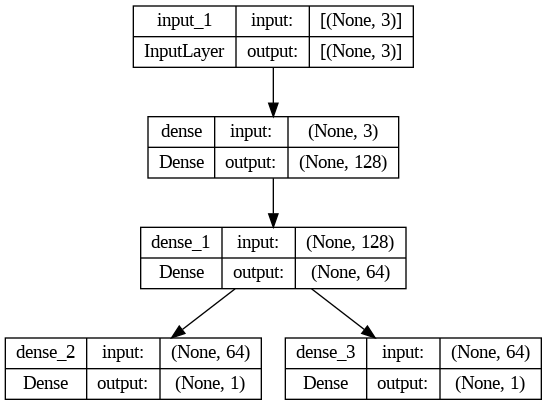

In [5]:
from keras.utils import plot_model

plot_model(model,show_shapes=True)

In [6]:
InputA=Input(shape=(32,))
InputB=Input(shape=(128,))

# i will creat a branch for input A

X=Dense(8, activation="relu")(InputA)
X1=Dense(4,activation="relu")(X)

In [7]:
#create a branch for the inputB

y=Dense(64,activation="relu")(InputB)

y1=Dense(32,activation="relu")(y)

y2=Dense(4,activation="relu")(y1)

In [8]:
combinedvalue=concatenate([X1,y2])

In [9]:
Z=Dense(2,activation="relu")(combinedvalue)
z1 = Dense(1, activation="linear")(Z)

In [10]:
model=Model(inputs=[InputA,InputB],outputs=z1)

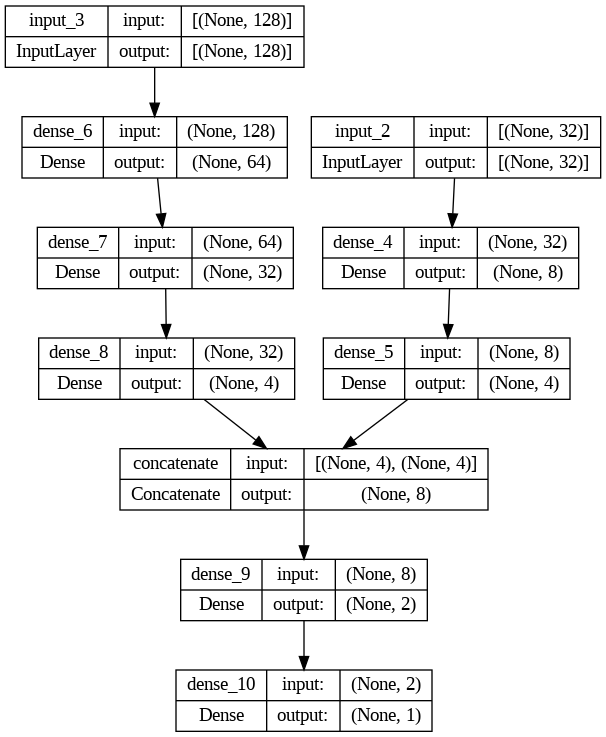

In [11]:
from keras.utils import plot_model

plot_model(model,show_shapes=True)

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d jangedoo/utkface-new

 99% 329M/331M [00:11<00:00, 32.4MB/s]
100% 331M/331M [00:11<00:00, 29.6MB/s]


In [14]:
PATH="/content/utkface-new.zip"

import zipfile
zip=zipfile.ZipFile(PATH,"r")
zip.extractall("/content")
zip.close()

In [15]:
folder_path="/content/utkface_aligned_cropped/UTKFace"

In [16]:
file="39_0_1_20170117165839076.jpg.chip.jpg"

In [17]:
int(file.split("_")[0])

39

In [18]:
int(file.split("_")[1])

0

In [19]:
folder_path = "/content/utkface_aligned_cropped/UTKFace"

In [20]:
import os
age=[]
gender=[]
img_path=[]

for file in os.listdir(folder_path):
  age.append(int(file.split("_")[0]))

  gender.append(int(file.split("_")[1]))

  img_path.append(file)

In [21]:
len(age)

23708

In [22]:
import pandas as pd
dataframe = pd.DataFrame({"age":age,"gender":gender,"img":img_path})

In [23]:
dataframe


,age,gender,img
0,11,1,11_1_4_20170109201611941.jpg.chip.jpg
1,73,0,73_0_1_20170117194721939.jpg.chip.jpg
2,27,1,27_1_0_20170117014038281.jpg.chip.jpg
3,21,0,21_0_1_20170115231442487.jpg.chip.jpg
4,50,0,50_0_0_20170117152322862.jpg.chip.jpg
...,...,...,...
23703,2,0,2_0_4_20170103213256420.jpg.chip.jpg
23704,15,0,15_0_0_20170103200828591.jpg.chip.jpg
23705,1,0,1_0_0_20161219192208688.jpg.chip.jpg
23706,20,0,20_0_0_20170113184350758.jpg.chip.jpg


In [24]:
dataframe.sample(frac=1,random_state=0)

,age,gender,img
15426,69,0,69_0_0_20170109011208585.jpg.chip.jpg
14084,55,0,55_0_0_20170117182554324.jpg.chip.jpg
22319,32,1,32_1_4_20170103230317985.jpg.chip.jpg
19518,26,0,26_0_4_20170117200038821.jpg.chip.jpg
2255,14,1,14_1_0_20170109204358190.jpg.chip.jpg
...,...,...,...
13123,6,1,6_1_4_20170103233146667.jpg.chip.jpg
19648,20,1,20_1_4_20170103201807368.jpg.chip.jpg
9845,25,1,25_1_3_20170119172144676.jpg.chip.jpg
10799,37,0,37_0_0_20170108235752354.jpg.chip.jpg


In [25]:
train = dataframe.sample(frac=1,random_state=0).iloc[:20000]
test = dataframe.sample(frac=1,random_state=0).iloc[20000:]

In [26]:
train.shape

(20000, 3)

In [27]:
test.shape

(3708, 3)

In [36]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)



test_datagen = ImageDataGenerator(rescale=1./255)



In [37]:
train_generator=train_datagen.flow_from_dataframe(train,
                                              directory=folder_path,
                                              x_col='img',
                                              y_col=['age','gender'],
                                              target_size=(200,200),
                                              class_mode='multi_output')


test_generator=test_datagen.flow_from_dataframe(test,
                                            directory=folder_path,
                                            x_col='img',
                                            y_col=['age','gender'],
                                            target_size=(200,200),
                                            class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [38]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model

In [39]:
resnet=ResNet50(include_top=False, input_shape=(200,200,3))

In [40]:
resnet.trainable=False

In [41]:
output=resnet.layers[-1].output

In [42]:
flatten=Flatten()(output)

dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(flatten)

dense3 = Dense(512,activation='relu')(dense1)
dense4 = Dense(512,activation='relu')(dense2)

output1 = Dense(1,activation='linear',name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name='gender')(dense4)

In [43]:
model=Model(inputs=resnet.input,outputs=[output1,output2])

In [44]:
model.compile(optimizer = 'adam', loss = {"age":"mse", "gender":"binary_crossentropy"}, metrics={"age":"mse","gender":"accuracy"})

In [ ]:
model.fit(train_generator,batch_size=32, epochs=2, validation_data=test_generator)

Epoch 1/2
475/625 [=====================>........] - ETA: 57s - loss: 418.1006 - age_loss: 417.2234 - gender_loss: 0.8771 - age_mae: 15.7158 - gender_accuracy: 0.5119